In [7]:
%matplotlib inline
from fbprophet import Prophet
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
import os
from prepare_cpd import get_cpd_df, get_info_list, select_reviews

import rootpath

In [8]:
root_dir = rootpath.detect()
filepath = os.path.join(root_dir, 'data', 'cpd_aspects', '6#ff018f51-ef0f-48d1-8c8f-636b4df3c1ff')

cpd_df, df = get_cpd_df(filepath, "room")
print(cpd_df)


loading the file : /home/yiyi/Documents/masterarbeit/CPD/data/cpd_aspects/6#ff018f51-ef0f-48d1-8c8f-636b4df3c1ff
length of df : 2336
length of df_new 383
preview of change point detection dataframe: 
                  date  sentiment
0  2015-01-01 00:00:00   0.099210
1  2015-01-04 00:00:00   0.155566
2  2015-01-05 00:00:00   0.498891
                    date  sentiment
0    2015-01-01 00:00:00   0.099210
1    2015-01-04 00:00:00   0.155566
2    2015-01-05 00:00:00   0.498891
3    2015-01-13 07:07:15   0.166219
4    2015-01-13 09:19:40  -0.493527
..                   ...        ...
223  2020-01-23 00:00:00   0.002218
224  2020-01-31 00:00:00  -0.496677
225  2020-02-24 00:00:00   0.496124
226  2020-03-05 00:00:00   0.003944
227  2020-03-17 00:00:00  -0.494197

[228 rows x 2 columns]


In [20]:
p_df = cpd_df.rename(columns={"date": "ds", "sentiment": "y"})

In [21]:
p_df

,ds,y
0,2015-01-01 00:00:00,0.099210
1,2015-01-04 00:00:00,0.155566
2,2015-01-05 00:00:00,0.498891
3,2015-01-13 07:07:15,0.166219
4,2015-01-13 09:19:40,-0.493527
...,...,...
223,2020-01-23 00:00:00,0.002218
224,2020-01-31 00:00:00,-0.496677
225,2020-02-24 00:00:00,0.496124
226,2020-03-05 00:00:00,0.003944


2015-07-31 00:00:00
2016-07-31 00:00:00
2017-04-27 00:00:00
2018-01-24 00:00:00
2018-10-11 00:00:00


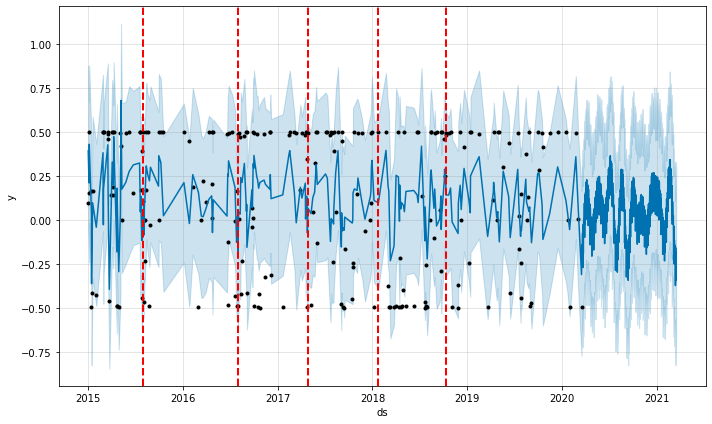

In [27]:
m = Prophet(changepoint_prior_scale=0.4, n_changepoints=5)
m.fit(p_df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)
for cp in m.changepoints:
    print(cp)
    plt.axvline(cp, c="red", ls="--", lw=2)

In [23]:
p_df

,ds,y
0,2015-01-01 00:00:00,0.099210
1,2015-01-04 00:00:00,0.155566
2,2015-01-05 00:00:00,0.498891
3,2015-01-13 07:07:15,0.166219
4,2015-01-13 09:19:40,-0.493527
...,...,...
223,2020-01-23 00:00:00,0.002218
224,2020-01-31 00:00:00,-0.496677
225,2020-02-24 00:00:00,0.496124
226,2020-03-05 00:00:00,0.003944
